In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("A3.ipynb")

## Question 1: Eigenvalues and Eigenvectors (2 Points)

### Question 1.1

Is the vector $v = \begin{bmatrix}1, -1, 0\end{bmatrix}$ an eigenvector of the matrix $M = \begin{bmatrix}4 & 1 & 1 \\ 1 & 4 & 1 \\ 1 & 1 & 4\end{bmatrix}$? 

If so, create a variable `eigen_val` and set it to the  corresponding eigenvalue. If $v$ is not an eigenvector of $M$, put `eigen_val = None`

Please hand calculate this, don't use libraries to do it for you.

_Points:_ 0.3

In [6]:
is_eigen_vec = True
eigen_val = 6.0

In [7]:
grader.check("11_eigen_val_and_vecs")

11_eigen_val_and_vecs results: All test cases passed!

### Question 1.2

Calculate the Eigenvalues and Eigenvectors of 

$$
\begin{bmatrix}
 2 & 7 \\
 -1 & -6 \\
\end{bmatrix}
$$

Assign the eigenvalues to variable `lamb1` and `lamb2` in **ascending order**, and their corresponding eigenvectors to `u1` and `u2` respectively.

Please hand calculate this, don't use libraries to do it for you.

_Points:_ 0.3

In [14]:
lamb1, lamb2 = 1.0, 5.0
u1, u2 = [-7,1], [-1,1]

In [15]:
grader.check("12_eigen_val_and_vecs")

12_eigen_val_and_vecs results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 1.3

$M$ is a 2×2 real-valued symmetric matrix with eigenvalues $\lambda_1 = 2$, $\lambda_2 = -1$ and corresponding eigenvectors

$$u_1 = \frac{1}{\sqrt{5}}\begin{bmatrix} 2 \\ 1\end{bmatrix}, u_2 = \frac{1}{\sqrt{5}}\begin{bmatrix} -1 \\ 2\end{bmatrix}$$

What are the eigenvalues of the matrix $M + 2I$ (where $I$ is the identity matrix)?

Please prove this or hand calculate it, don't use libraries to do it for you numerically.

_Points:_ 0.3

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.4

$M$ is a 2×2 real-valued symmetric matrix with eigenvalues $\lambda_1 = 2$, $\lambda_2 = -1$ and corresponding eigenvectors

$$u_1 = \frac{1}{\sqrt{5}}\begin{bmatrix} 2 \\ 1\end{bmatrix}, u_2 = \frac{1}{\sqrt{5}}\begin{bmatrix} -1 \\ 2\end{bmatrix}$$

What are the eigenvalues of the matrix $M^2 = MM$?

Please prove this or hand calculate it, don't use libraries to do it for you numerically.

_Points:_ 0.3

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.5

If ${\bf v}$ is an eigenvector of the matrix $A^TA$ with eigenvalue $\lambda$, show that $A{\bf v}$ is an eigenvector of $A A^T$ with the same eigenvalue $\lambda$. 

Remember to obey the rules for _matrix_ multiplication.

BTW, this is a cool linear algebra trick we will use later to make calculations easier when $A$ has a huge number of rows and a reasonable number of columns. 



_Points:_ 0.8

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## Question 2: Spetral Clustering (3 Points)

### Q2.1 Load Data

The data is saved in `A3.csv` which contains 3 columns. `x` and `y` columns contains the coordiantes of a datapoint, and the `label` column contains information of which cluster does the point belongs to. First load `A3.csv` into a pandas DataFrame. 

_Points:_ 0.2

In [8]:
# Some useful imports

import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [11]:
df = pd.read_csv('data/A3.csv')

In [12]:
grader.check("21_load_data")

21_load_data results: All test cases passed!

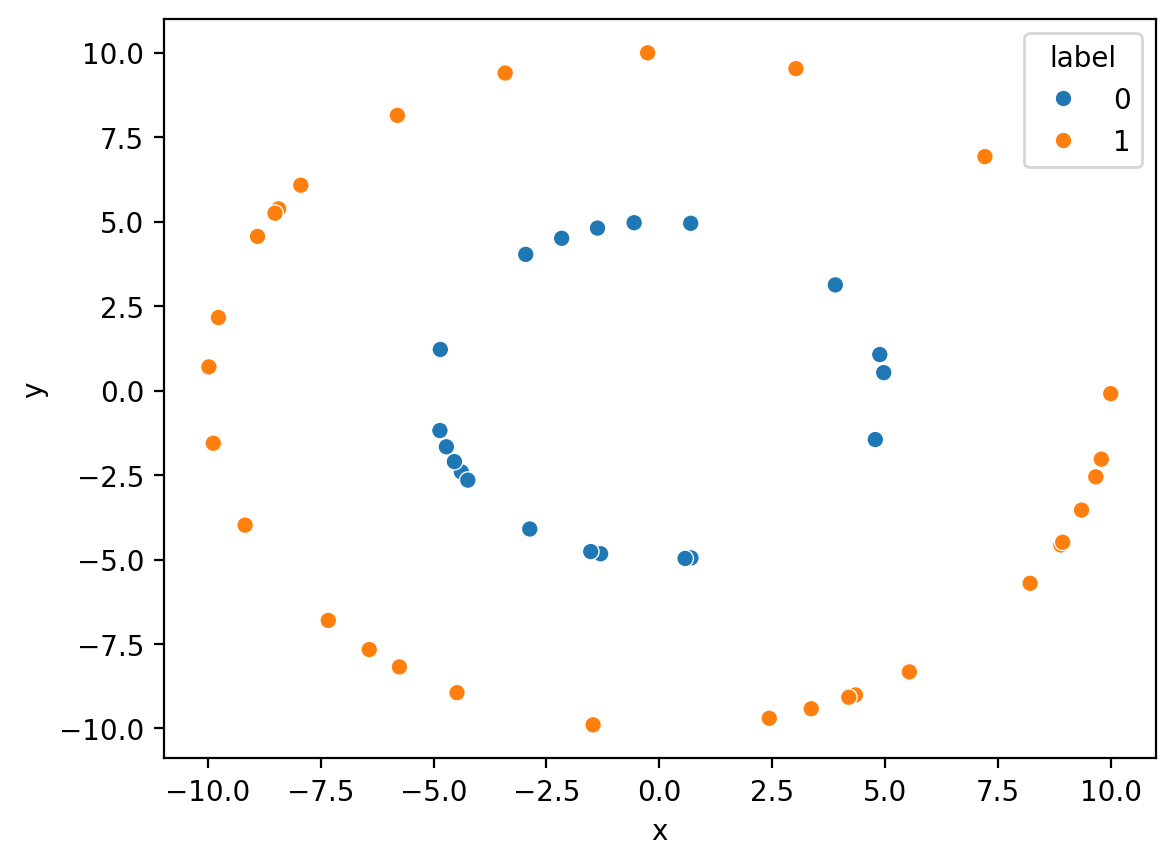

In [13]:
# put the datapoints in a 2D numpy array
data = np.array([df['x'].tolist(), df['y'].tolist()]).T
sns.scatterplot(data=df, x='x', y='y', hue='label');

### Q2.2 Implement a function that calculates the similarity between 2 points

The similarity between $x_i$ and $x_j$ is given by the following:
$$\text{similarity} = \exp(-\frac{||x_i-x_j||^2}{2\sigma^2})$$

_Points:_ 0.6

In [29]:
def similarity(xi, xj, sigma_square=1.0):
    '''
    calculates RBF similarity between two vectors of the same size
    
    parameters: 
        xi, xj are numpy arrays or other iterable defining two vectors
        sigma_square is the RBF normalization constant (default 1.0)
    returns: 
        the RBF similarity function defined in the cell above for xi, xj
    '''
    s = np.exp(-np.square(np.linalg.norm(xi-xj))/(2*sigma_square))
    return s

In [30]:
grader.check("22_similarity")

22_similarity results: All test cases passed!

### Q2.3 Implement a function that computes the Affinity Matrix

Your Affinity Matrix $A$ should have a dimension of $N\times N$ where $N$ is the number of data points in the dataset. The element on the $i$ th row and $j$ th column of $A$ should contain the similarity between $x_i$ and $x_j$. 

$$A_{ij} = \exp(-\frac{||x_i-x_j||^2}{2\sigma^2})$$

(Hint: You can build on the function you implemented in Q2.2)

_Points:_ 0.7

In [53]:
def construct_similarity_matrix(X, sigma_square=1.0):
    '''
    calculates an affinity matrix using RBF similarity between rows of a matrix
    
    parameters:
        X is an NxD matrix
        sigma_square is the RBF normalization constant (default 1.0)
    returns:
        the NxN affinity matrix 
    '''
    n = X.shape[0]
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            S[i][j] = similarity(X[i], X[j])
    
    return S

In [54]:
grader.check("23_affinity_matrix")

23_affinity_matrix results: All test cases passed!

### Q2.4 Plot the affinity matrix and comment on your findings

Use the `plot_affinity` function below to plot the Affinity Matrix and explore different values of `sigma_square`ranging from 0.1 to 5. Use a Markdown cell in the solution region below to comment on your findings.

_Points:_ 0.2

In [55]:
def plot_affinity(data, sigma_square=0.5):
    A = construct_similarity_matrix(data, sigma_square=sigma_square)
    plt.imshow(A)
    plt.colorbar()

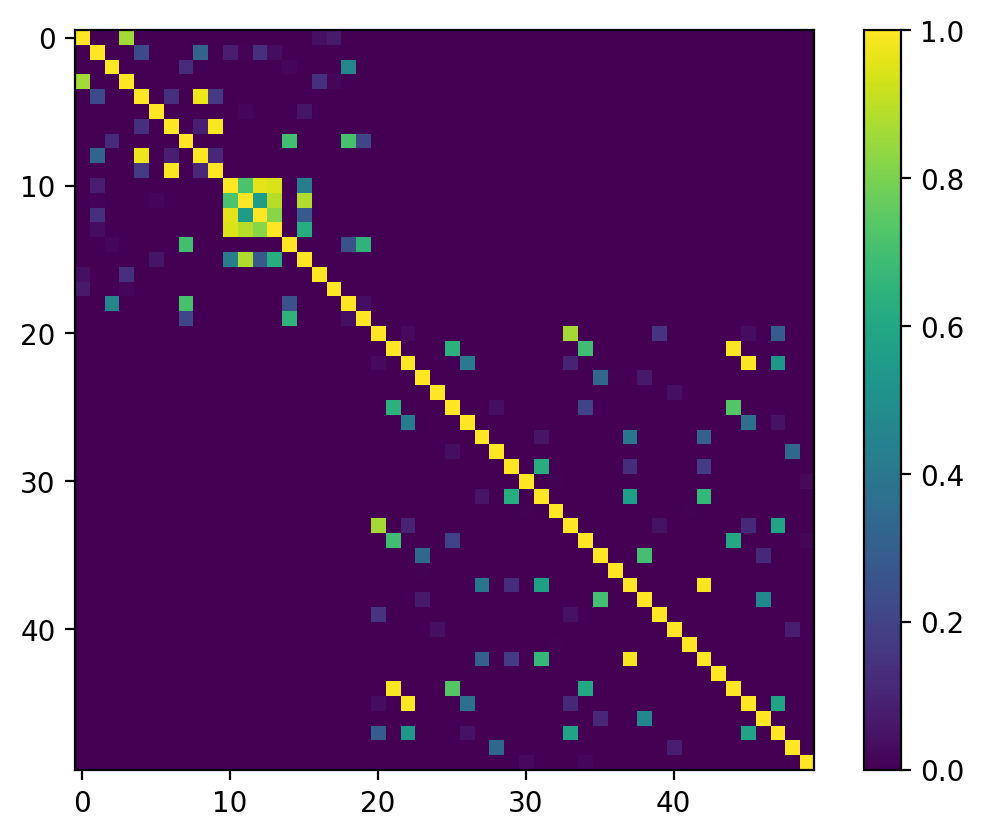

In [56]:
plot_affinity(data,sigma_square=1)

### Q2.5 Calculate the Laplacian Matrix and run KMeans

1. Calculate the affinity matrix `A` with the function you implemented in Q2.3.
2. Calculate the degree matrix `D` where `D` is a diagonal matrix with $D_{ii} = \sum_jA_{ij}$
3. Calculate the symmetric normalzied Laplacian matrix `L` with $L=I-D^{-1/2}AD^{-1/2}$. (Hint: since $D$ is a diagonal matrix, you can calculate $D^{-1/2}$ by taking the reciprocal of the square root of each non-zero element along the diagonal)
5. Find the eigenvalues and eigenvectors of the Laplacian matrix `L`
6. Set the variable `min_eigenvectors` to the 2 eigenvectors corresponds to the 2 smallest eigenvalues (_Hint:_ the dimension/shape of this should be (50,2)).
7. The rest of the code will run KMeans (k=2) with the 2 eigenvectors and plot the result. Explore different values of $\sigma^2$ and see how does it affects your result. 

Describe the final value of $\sigma^2$ you settled on, assign it to the `sigma_square` value.

_Points:_ 1.3

In [82]:
A = construct_similarity_matrix(data)
n = A.shape[0]
D = np.zeros((n,n))
for i in range(n) :
    for j in range(n) :
        if i == j :
            D[i][j] = np.sum(A[i,:]) 

D_power = np.zeros((n,n))
for i in range(n):
    D_power[i][i] = np.reciprocal(np.sqrt(D[i][i]))

L = np.identity(n) - D_power @ A @ D_power

evals, evecs = np.linalg.eig(L)
sorted_indices = np.argsort(evals)
sorted_evals = evals[sorted_indices]
sorted_evecs = evecs[:, sorted_indices]

min_evals = sorted_evals[0:2]
min_eigenvectors = sorted_evecs[:,0:2]
min_eigenvectors.shape


(50, 2)

/Users/olimpiacarrioli/Assignments_WI24-1/COGS118B_venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


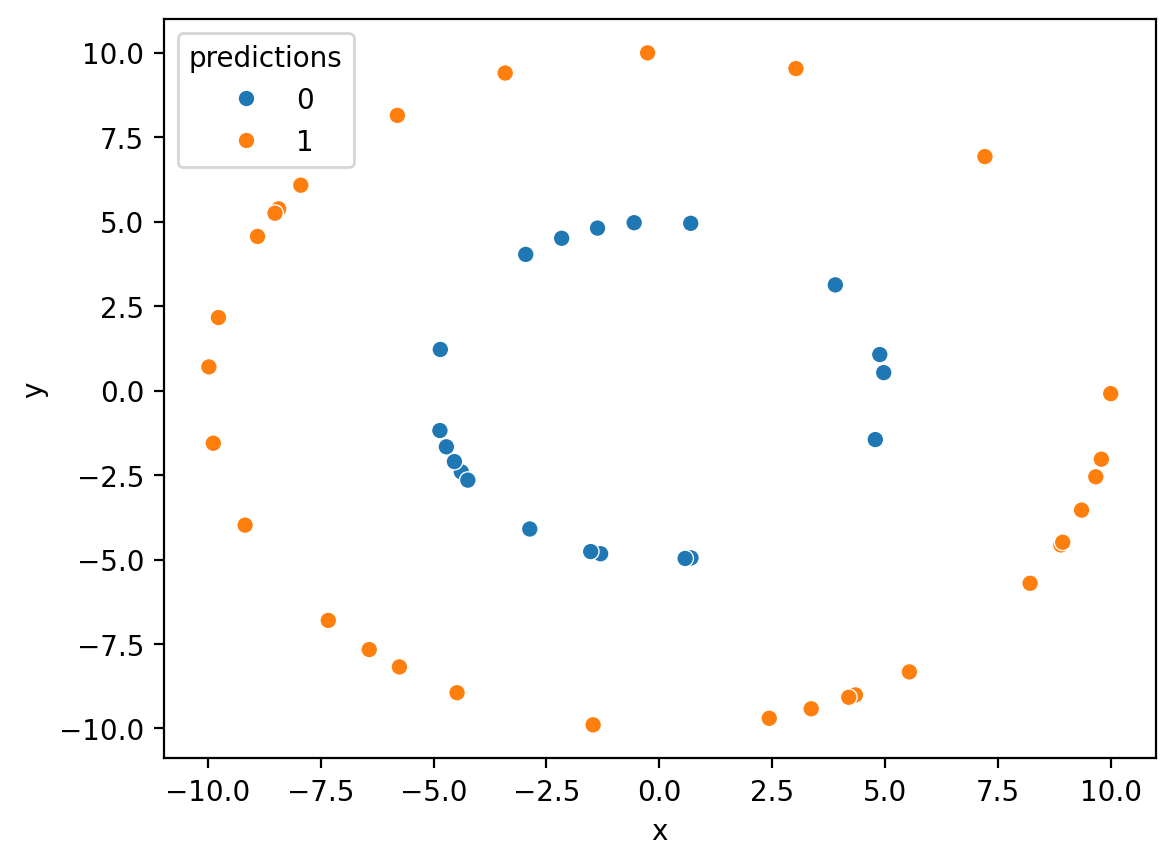

In [86]:
# assign your sigma_square value here
sigma_square = 1.0
min_eigenvectors = sorted_evecs[:,0:2]

...

# Normalizing the eigenvectors for K_Means
divmat = np.sqrt(np.sum(min_eigenvectors**2, axis=1)).reshape(-1, 1)
Y = min_eigenvectors / divmat

kmeans = KMeans(n_clusters=2, random_state=42).fit(Y)
predictions = kmeans.labels_
df['predictions'] = predictions
sns.scatterplot(data=df, x='x', y='y', hue='predictions');

In [87]:
grader.check("25_affinity_matrix_plot")

25_affinity_matrix_plot results: All test cases passed!

## Question 3: PCA (1.2 Points)

In [88]:
X = pickle.load(open('data/dataset.pkl','rb')).T

For loops are not needed for any of these questions, except maybe in the eigsort function. All of these can be done concisely by using the formulas exactly as display by using broadcasting and element wise operations

### Question 3.1: Create a scatter plot of the dataset using matplotlib

_Points:_ 0.1

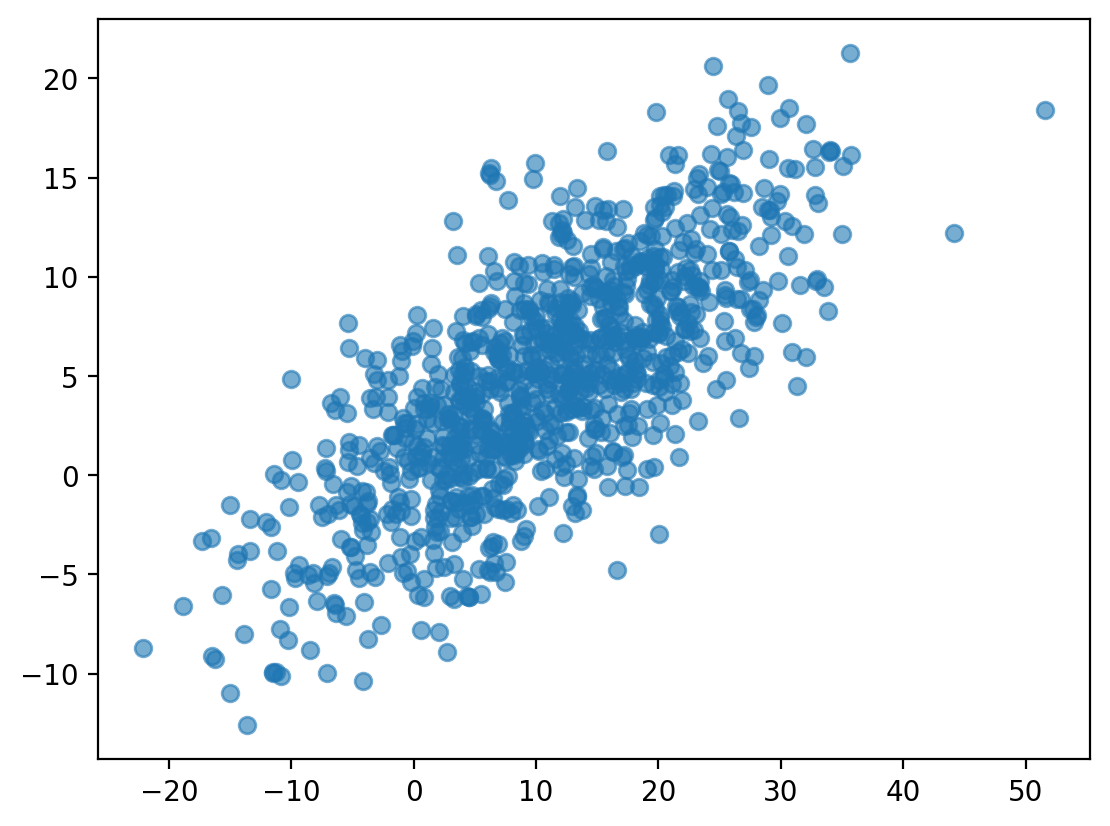

In [102]:
plt.scatter(x=X[0,:], y=X[1,:], alpha=0.6);

### Q3.2 Get the mean vector and covariance matrix of the dataset.

1. Get the mean vector of the dataset. This should be a column vector with the shape (2,1). 
Hint: Use the keepdims parameter with np.mean, and then make sure you are taking the mean across the correct axis.

2. Using the mean vector, mean center the data, and store the empirical covariance matrix estimate which is given by the formula $\frac{1}{n}ZZ^T$, where Z is our mean centered data.

3. Store the mean in variable `mu` and store the covariance in variable `Sigma`


_Points:_ 0.3

In [112]:
mu = np.mean(X, axis=1, keepdims=True)
Z = np.subtract(X, mu)
n = Z.shape[1]
Sigma = (Z @ np.transpose(Z) / n)

In [113]:
grader.check("32_mean_cov")

32_mean_cov results: All test cases passed!

### Q3.3 Obtaining Principal Components
Using `np.linalg.eigh` please obtain the eigenvectors of the covariance matrix, store them in variables `eigenvalues` and `eigenvectors` accordingly. 

_Points:_ 0.3

In [114]:
eigenvalues,eigenvectors = np.linalg.eigh(Sigma)

In [115]:
grader.check("33_pca")

33_pca results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q3.4 Interpret Eigenvalues and Eigenvectors
Please explain what these eigenvectors represent, and what the associated eigenvalues represent as well.

_Points:_ 0.3

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.5 PCA Projection and Plot
1. PLOT #1: You will project the mean centered data onto its principal component basis. Make a scatter plot of the projected data.  The graph should have a title ("Data projected onto principal components") and axis labels ("PC1", "PC2").

2. PLOT #2: You will visualize the PCs in the data's original coordinates.  The graph should have a title ("PC directions in the original data basis") and axis labels ("x", "y"). Lay to following plots on top of each other to form a single graph:
    - Scatter plot the original data
    - Plot a large red dot (use `c='r', s=100`) at the mean of the data
    - using commands of the form `plt.plot([vec_x_start, vec_x_end],[vec_y_start, vec_y_end], c='r', linewidth=5)` plot both PC1 and PC2 in wide, red lines. Note that
        - PCs should start at the mean of the data
        - PCs should be scaled by the square root of their eigenvalues (remember we squared the data to get the covariance matrix)
  

_Points:_ 0.2

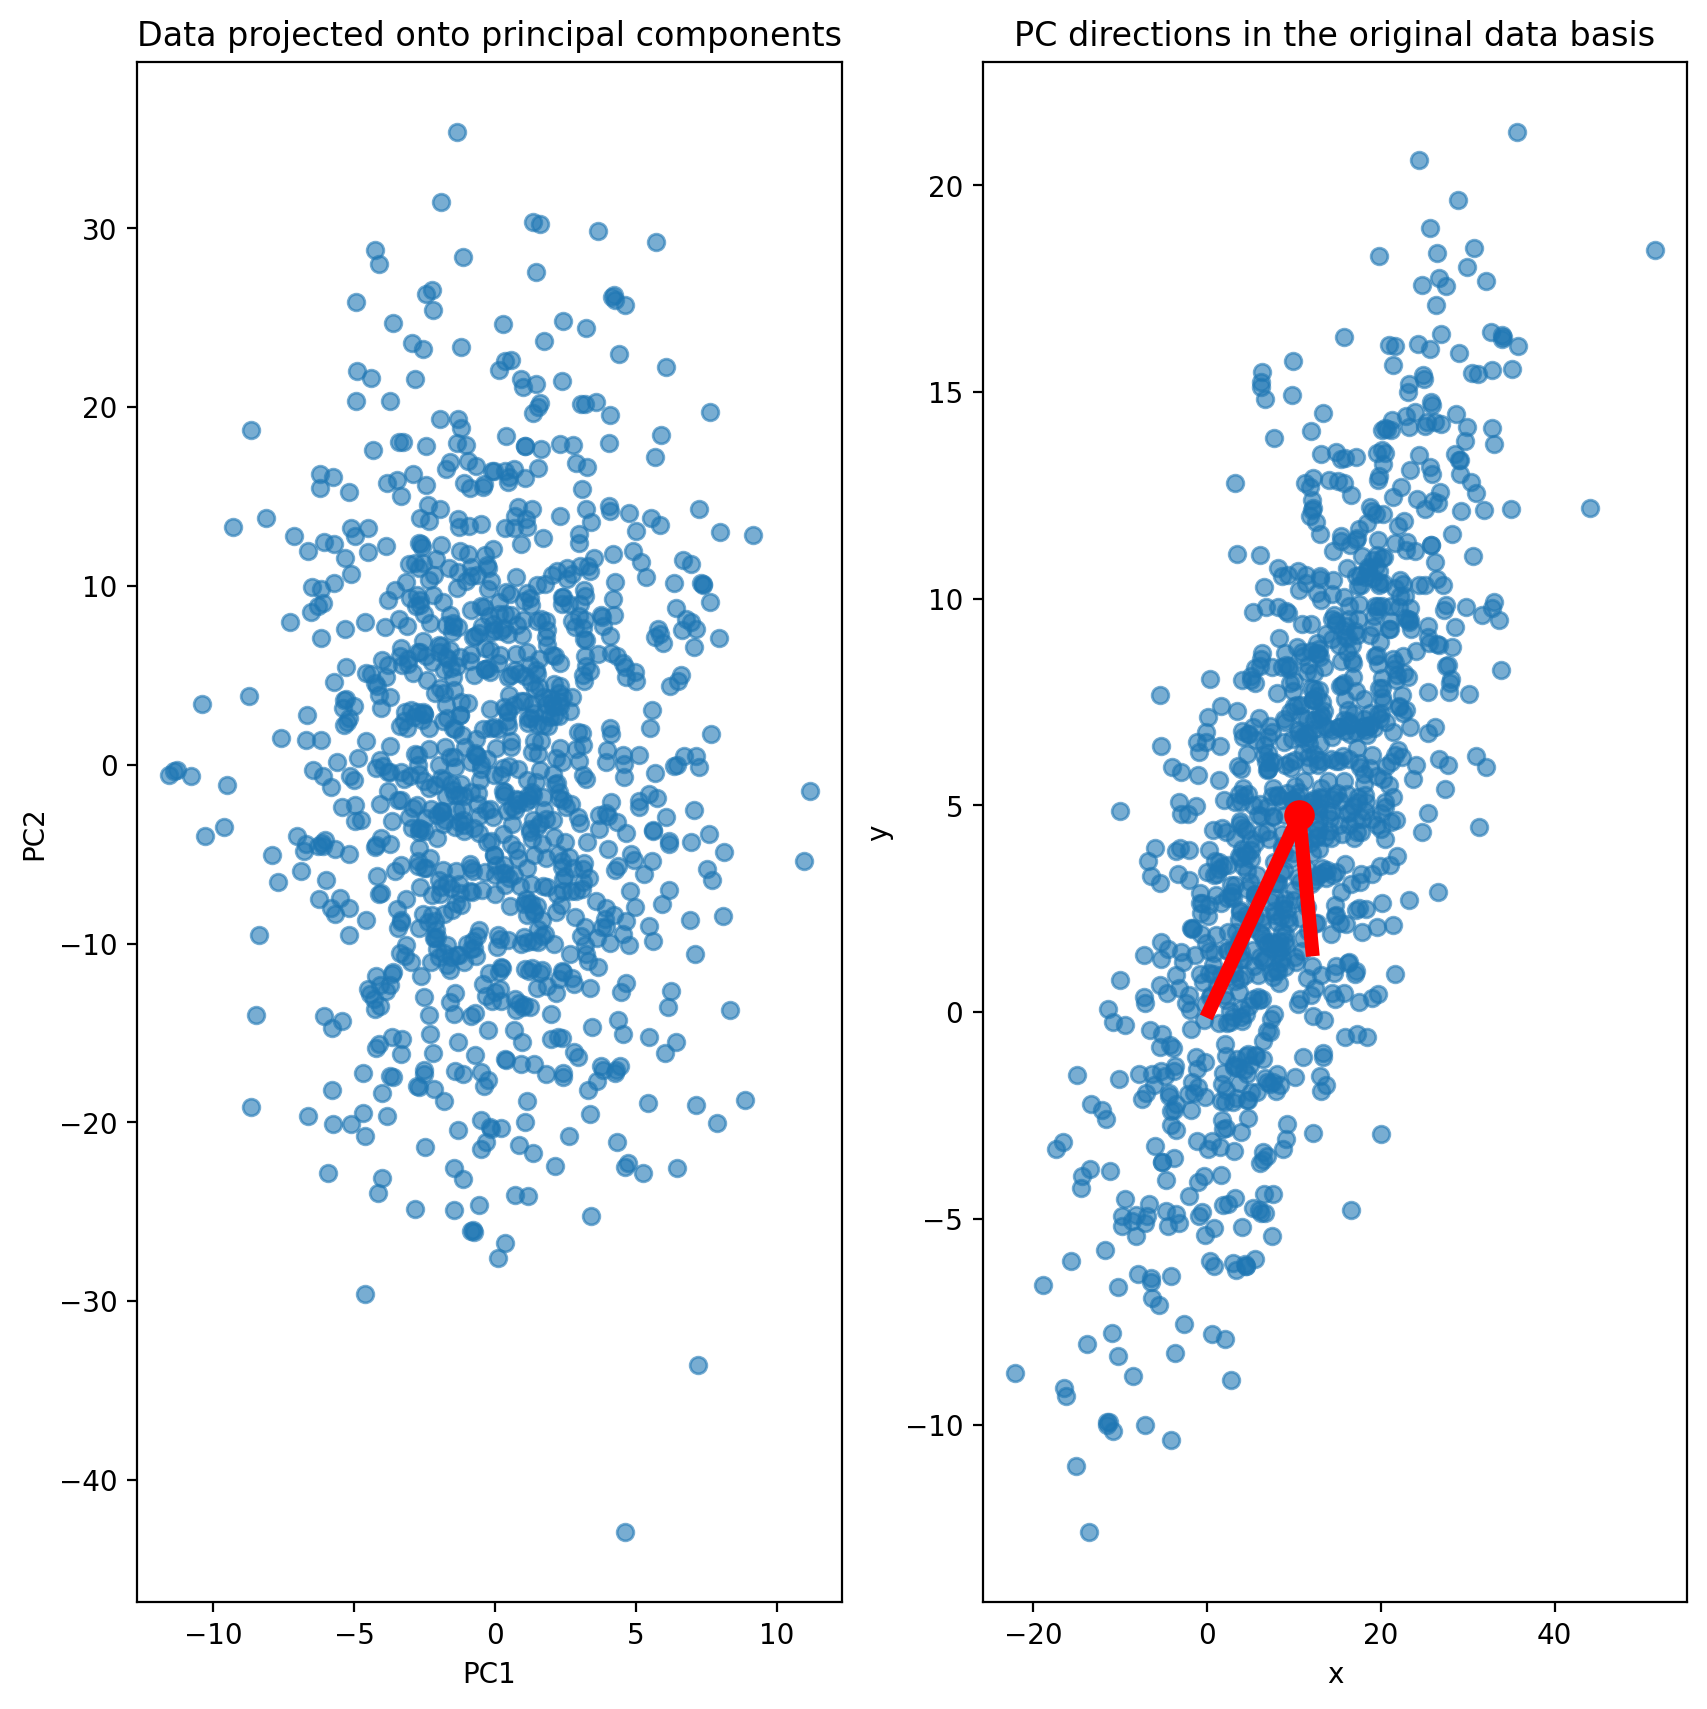

In [151]:
# plot those two graphs here.
proj = eigenvectors.T.dot(Z)
fig, axs = plt.subplots(1,2, figsize =(10,10))
axs[0].scatter(x=proj[0,:], y=proj[1,:], alpha=0.6)
axs[0].set_title('Data projected onto principal components')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')


axs[1].scatter(x=X[0,:], y=X[1,:], alpha=0.6)
axs[1].scatter(mu[0],mu[1], c='r', s=100)
mu_flat = mu.flatten()

pc1_end = mu_flat + eigenvectors[:, 0] * np.sqrt(eigenvalues[0])
pc2_end = mu_flat + eigenvectors[:, 1] * np.sqrt(eigenvalues[1])

axs[1].plot([mu_flat[0], pc1_end[0]], [mu_flat[1], pc1_end[1]], 'r-', linewidth=5)
axs[1].plot([mu_flat[0], pc2_end[0]], [mu_flat[1], pc2_end[1]], 'r-', linewidth=5)
axs[1].set_title('PC directions in the original data basis')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.show;

<!-- END QUESTION -->

## Question 4: PCA on Face Data (3.8 Points)

For this question, use the dataset `q4_data.mat`, and `q4b_data.mat` to answer the following questions. You can use the provided functions or write your own implementation to complete this question.

In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

%matplotlib inline
%config InlineBackend.figure_format='retina'

# view_column Displays a 60 x 60 grayscale image stored in a column vector.

def view_column(col_vec, title=None):
    plt.imshow(col_vec.reshape([60, 60], order='F'), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(title)
    plt.show()

# normc(M) normalizes the columns of M to a length of 1.

def normc(matrix):
    return normalize(matrix, norm='l2', axis=0)

# Load the data
q4b_data = sio.loadmat('./data/q4b_data.mat')
faces = q4b_data['faces']
dog = q4b_data['dog']
x = q4b_data['x']

### Question 4.0

Use the `view_column` command to view the 5th face image, which is stored in the 5th column of the `faces` matrix.

_Points:_ 0.1

In [ ]:
for i in range(5):
    view_column(faces[:, i], title=f"{i+1}-th face")

### Question 4.1

Compute the mean face (use `numpy.mean`). Then use `view_column` to see it.

In [ ]:
mean_face = ...
...

In [ ]:
grader.check("41_mean_face")

### Question 4.2 Calculating the Eigenvalues and Eigenvectors

Subtract the mean from all of the face images, and store the matrix of mean-subtracted faces in a variable `A`. Use appropriate commands to compute the eigenvectors and eigenvalues of $A^TA$. Store the sorted eigenvectors according to their eigenvalues in the variable `eig_vecs`, and `eig_vals`.

_Note:_ we are not computing the eigenvectors and eigenvalues of $AA^T$ directly because that is a very big matrix. See the transpose trick from the previous **question 1.4**. We have also dropped the term $1/n$ from the covariance matrix equation as it does not affect the eigenvectors (it just changes the eigenvalues, which are not used, by a factor of $n$

_Hint:_ You will need to manipulate the shape of the mean face matrix to allow [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html).

_Points:_ 0.7

In [ ]:
A = ...
eig_vals, eig_vecs = ...

In [ ]:
grader.check("42_calc_eigen_vec")

### Question 4.3 Calculating the Eigen-faces

`eig_vecs` contains the sorted eigenvectors of $A^T A$. Recalling the transpose trick from the previous **question 1.4**: Use $A$ and `eig_vecs` to calculate $U$, the matrix of eigen-faces (the eigenvectors of $A A^T$).

_Points:_ 0.5

In [ ]:
U = ...

In [ ]:
grader.check("43_calc_eigen_vec")

After calculating the eigenfaces $U$, then we proceed to normalize that eigenfaces matrix.

In [ ]:
U = normc(U)

### Question 4.4 Reconstructing Faces

Find the principal component coordinates of the 5th face image in the data set.  (This is just like what you did for question (D) 1. above). This is the re-representation of the zero-meaned fifth face in the new data-aligned coordinate space. Call the vector of principal component coordinates `c`.

Do the followings:

1. Display the 3rd eigenface (use the `view_column` command)

2. Reconstruct the 5th face using all 48 principal components, assign the reconstruction to `reconst_full`

    - Remember that $\hat{z}=U_{\rm reduced}*c_{\rm reduced}+{\rm meanface}$)
where $U_{\rm reduced}$ has as columns of the principal component directions that you wish to use  and $c_{\rm reduced}$ has the corresponding principal component coordinates.

    - For all reconstructions, remember to add back the mean face!

3. Reconstruct the 5th face using only the first 10 principal components, assign the reconstruction to `reconst_10`


_Points:_ 1.1

In [ ]:
# Find the PC coordinates of the 5th face image.
c = ...

# display the eigenface:
...

In [ ]:
# Reconstruct the 5th face using all PC:
reconst_full = ...

# Plot the Full Reconstruction and the OG face
view_column(reconst_full, "Full Reconstruction")
view_column(faces[:, 4], "Original Face")

In [ ]:
# Reconstruct the 5th face using only the first 10 PC:
reconst_first_10 = ...

# Plot the Full Reconstruction and the OG face
view_column(reconst_first_10, "Partial Reconstruction using 10 PC")
view_column(faces[:, 4], "Original Face")

In [ ]:
grader.check("44_reconst_faces")

### Question 4.5 Non-face Image Projection

Let's explore what happens when a non-face image is projected into
face space.

1. The vector `dog` contains a 60x60 picture of a dog. Display the picture of the dog. 

2. Using the eigenfaces you found (Do NOT recompute the eigenfaces), find the principal component coordinates of
the dog image.  $c_{\rm dog}=U'*(\rm dog-meanface)$. This gives the coordinates of the dog image in the face-aligned space. Assign the projection to the variable `c_dog`.

3. Reconstruct the dog picture using all 48 principal components, and display the image, and assign the reconstruction to variable `dog_reconst`. (This is just like previous question except you use the principal component coordinates computed from the dog above). This is the best reconstruction of the dog image in the face space. (Remember to add back in the meanface)


_Points:_ 0.6

In [ ]:
# Visualize the Dog
view_column(dog, "Dog Image")

# make the mean_face dimension consistents with the dog image
mean_face = mean_face.reshape(-1, 1)

# Calculate the projection of the dog image

c_dog = ...

# dog_reconsturction
dog_reconst = ...

view_column(dog_reconst, "Dog Full Reconstruction")

In [ ]:
grader.check("45_reconst_non_face")

<!-- BEGIN QUESTION -->

### Question 4.6 Non-face Image Projection

Does the reconstructed dog look like the original picture? Explain why the reconstruction looks the way it does.


_Points:_ 0.4

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## The End of A3

Have a look back over your answers, and also make sure to `Restart & Run All` from the kernel menu to double check that everything is working properly. This restarts everything and runs your code from top to bottom.

Once you're happy with your work, click the disk icon to save, and submit the zip file onto gradescope. **You MUST submit all the required component to receive credit.**

Note that you can submit at any time, but **we grade your most recent submission**. This means that **if you submit an updated notebook after the submission deadline, it will be marked as late**.

_Note:_ If you encountered `LatexFailed` message during exporting, or has the `AttributeError: module 'nbconvert' has no attribute 'pdf'` error, it indicates that your $\LaTeX$ code is not correct. Try to the LaTeX syntax error by scrolling up to see the LaTeX error message. If you need any additional helps, please make a private post on campuswire and we are happy to help.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Please make sure to see the output of the gradescope autograder. You are responsible for waiting and ensuring that the autograder is executing normally for your submission. Please create a campuswire post if you see errors in autograder execution.

In [ ]:
grader.export(force_save=True, run_tests=True, files=['data'])